In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
np.random.seed(42)
m = 100  # number of data points
X = 2 * np.random.rand(m, 1)  # shape = (100, 1)
y = 4 + 3 * X + np.random.randn(m, 1)  # adds Gaussian noise

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # adds a bias term (1) to every input


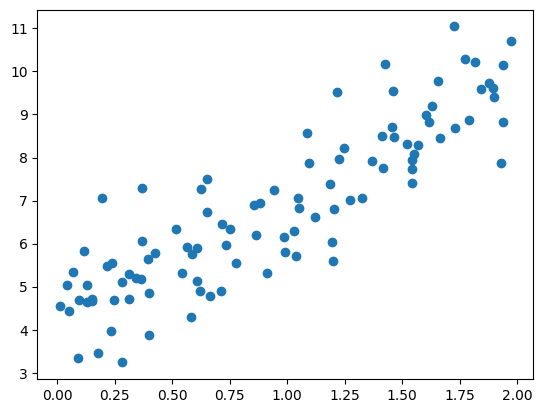

In [5]:
plt.plot(X,y,'o')

In [6]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

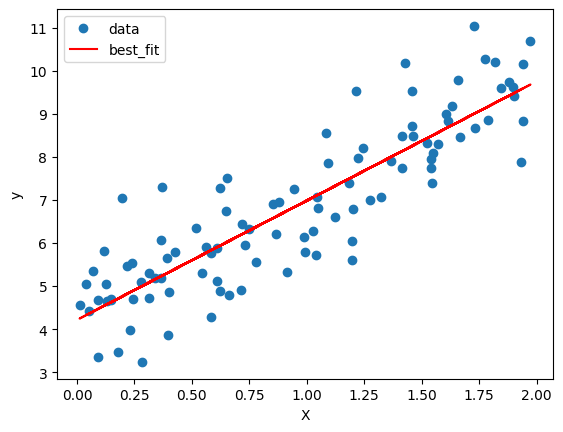

In [8]:
best_fit = theta_best[0] + theta_best[1] * X
plt.plot(X,y,'o',label='data')
plt.plot(X,best_fit,'r-',label='best_fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_




(array([4.21509616]), array([[2.77011339]]))

In [10]:
theta_best_svd, residuals, rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd



array([[4.21509616],
       [2.77011339]])

In [11]:
theta_inverse = np.linalg.pinv(X_b) @ y
theta_inverse

array([[4.21509616],
       [2.77011339]])

In [12]:
X_a = np.c_[np.ones((m,1)),X]

# GRadient Descent

In [ ]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances
thes = {}

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    thes.append(gradients)

In [14]:
theta

array([[4.21509616],
       [2.77011339]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.flatten())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

# Stochastic Gradient Descent 

In [ ]:
n_epochs = 50
x = {}
y= {}
teta = {}
t0, t1 = 5,50 
def learning_rate(t):
 return t0/(t+t1)
np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
 for i in range(m):
  random_index = np.random.randint(m)
  xi = X_b[random_index:random_index+1]
  yi = y[random_index:random_index+1]
  x.append(xi)
  y.append(yi)
  gradients = 2 * xi.T @ (xi @ theta - yi)   
  eta = learning_rate(epoch * m + i)
  theta = theta - eta * gradients
  teta.append(theta)  

theta


array([[4.21076011],
       [2.74856079]])

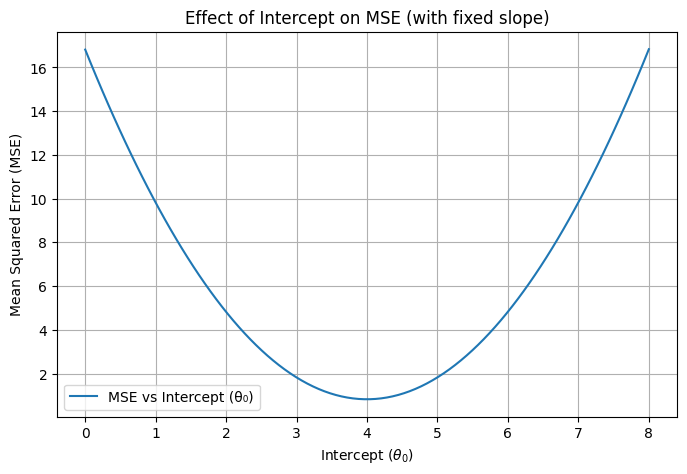

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Fix slope (theta_1)
fixed_theta1 = 3.0

# Range of intercepts (theta_0) to test
theta0_range = np.linspace(0, 8, 100)
mse_values = []

for theta0 in theta0_range:
    theta = np.array([[theta0], [fixed_theta1]])
    predictions = X_b @ theta
    mse = np.mean((predictions - y) ** 2)
    mse_values.append(mse)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(theta0_range, mse_values, label='MSE vs Intercept (θ₀)')
plt.xlabel(r'Intercept ($\theta_0$)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Intercept on MSE (with fixed slope)')
plt.grid(True)
plt.legend()
plt.show()
